In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import numpy as np

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)

In [ ]:
train = pd.read_csv("train_final.csv")
test = pd.read_csv("test_final.csv")

In [ ]:
train["past_value_mean"].fillna(0,inplace=True)
test["past_value_mean"].fillna(0,inplace=True)

In [ ]:
train.replace(np.inf, 99, inplace=True)
train.replace(-np.inf, -99, inplace=True)
test.replace(np.inf, 99, inplace=True)
test.replace(-np.inf, -99, inplace=True)

In [ ]:
train = train.sort_values("min_date")
train = train.drop(["user_session","min_date","max_date","user_id"],axis=1)

x = train.drop("session_value",axis=1)
y = train["session_value"]

In [ ]:
test = test.sort_values("min_date")
test = test.drop(["min_date","max_date","user_id"],axis=1)

test_x = test.drop("user_session",axis=1)

In [ ]:
model_cb = CatBoostRegressor(task_type="GPU",cat_features=["user_id"],iterations=10000)
model_cb.fit(x,y)

Learning rate set to 0.017849
0:	learn: 46.9523766	total: 5.24ms	remaining: 52.4s
1:	learn: 46.3555270	total: 10.4ms	remaining: 52s
2:	learn: 45.7809414	total: 15.7ms	remaining: 52.3s
3:	learn: 45.2217888	total: 20.8ms	remaining: 52s
4:	learn: 44.6618424	total: 25.9ms	remaining: 51.8s
5:	learn: 44.1165587	total: 31.3ms	remaining: 52.2s
6:	learn: 43.5860574	total: 36.4ms	remaining: 52s
7:	learn: 43.0635922	total: 41.5ms	remaining: 51.9s
8:	learn: 42.5621025	total: 46.7ms	remaining: 51.8s
9:	learn: 42.0553647	total: 52ms	remaining: 52s
10:	learn: 41.5609518	total: 57.2ms	remaining: 52s
11:	learn: 41.0752574	total: 62.2ms	remaining: 51.8s
12:	learn: 40.5977156	total: 67.4ms	remaining: 51.8s
13:	learn: 40.1367897	total: 72.7ms	remaining: 51.9s
14:	learn: 39.6838416	total: 78ms	remaining: 51.9s
15:	learn: 39.2432271	total: 83.3ms	remaining: 52s
16:	learn: 38.8078978	total: 89.8ms	remaining: 52.8s
17:	learn: 38.3859936	total: 95.2ms	remaining: 52.8s
18:	learn: 37.9826521	total: 101ms	remaini

In [ ]:
param = {'objective': 'reg:squarederror', 'device': 'gpu', 'random_state': 22, 'eta': 0.06805925858288127,
         'gamma': 0.007598560661707519, 'max_depth': 5, 'min_child_weight': 26, 'max_delta_step': 10,
           'subsample': 0.6501883007229573, 'colsample_bytree': 0.8024275970546287, 'colsample_bylevel': 0.83207869249364,
           'colsample_bynode': 0.8330850030340746,
         'lambda': 0.20263332224150976, 'alpha': 0.04126849049726349, 'n_estimators': 1262}
model_xgb = XGBRegressor(**param)
model_xgb.fit(x,y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,0.83207869249364
,colsample_bynode,0.8330850030340746
,colsample_bytree,0.8024275970546287
,device,'gpu'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
param = {'objective': 'regression', 'metric': 'mse', 'boosting_type': 'gbdt',
          'bagging_freq': 1, 'device': 'gpu', 'verbose': -1, 'seed': 22, 'max_depth': 10,
          'num_leaves': 185, 'learning_rate': 0.03379804568947715, 'feature_fraction': 0.7631689116313735,
         'bagging_fraction': 0.725487183733751, 'min_child_samples': 9, 'reg_alpha': 4.004772054281709, 'reg_lambda': 0.3720556225791429}
model_lgbm = LGBMRegressor(**param)
model_lgbm.fit(x,y)

,boosting_type,'gbdt'
,num_leaves,185
,max_depth,10
,learning_rate,0.03379804568947715
,n_estimators,100
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,9


In [ ]:
model_cb = CatBoostRegressor()
model_cb.fit(x,y)

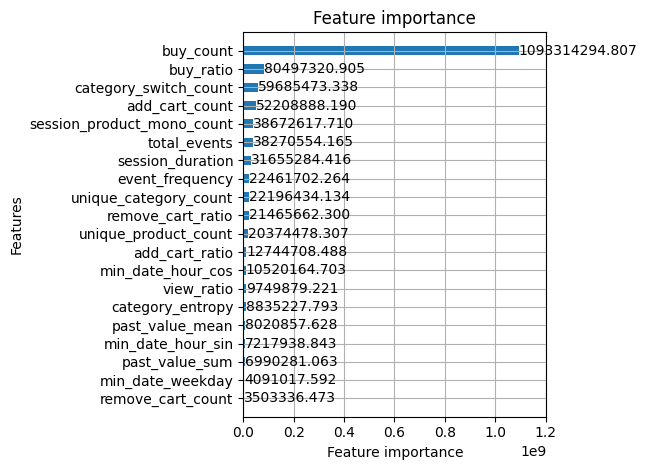

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
lgb.plot_importance(model_lgbm, max_num_features=20, importance_type='gain', height=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
xgb.plot_importance(model_lgbm, max_num_features=20, importance_type='gain', height=0.5)
plt.tight_layout()
plt.show()

In [ ]:
pred = model_cb.predict(test_x)
test["prediction"] = pred

In [ ]:
prediction_xgb = model_xgb.predict(test_x)
test["prediction_xgb"] = prediction_xgb

prediction_lgbm = model_lgbm.predict(test_x)
test["prediction_lgbm"] = prediction_lgbm

prediction_cb = model_cb.predict(test_x)
test["prediction_cb"] = prediction_cb

In [ ]:
test["prediction"] = (test["prediction_xgb"] + test["prediction_lgbm"] + test["prediction_cb"])/3

In [ ]:
train_original = pd.read_csv("train.csv")

train_unique_sessions = train_original[["user_session", "session_value"]].drop_duplicates(subset="user_session").reset_index(drop=True)

test = test.merge(
    train_unique_sessions,
    on="user_session",
    how="left",
)

test["prediction"] = np.where(
    test["session_value"].notna(),
    test["session_value"],
    test["prediction"]
)

In [ ]:
submission = test[["user_session","prediction"]]
submission.to_csv("submission10.csv",index=False)

In [ ]:
submission

,user_session,prediction
0,SESSION_149934,49.718330
1,SESSION_000337,156.524664
2,SESSION_104781,42.407518
3,SESSION_051551,33.517035
4,SESSION_094620,36.796117
...,...,...
30784,SESSION_026660,24.009353
30785,SESSION_123850,23.538790
30786,SESSION_076452,27.005201
30787,SESSION_106724,27.844796


In [ ]:
submission

,user_session,prediction
0,SESSION_149934,314.900000
1,SESSION_000337,172.290000
2,SESSION_104781,43.621760
3,SESSION_051551,33.642367
4,SESSION_094620,29.400000
...,...,...
30784,SESSION_026660,21.533545
30785,SESSION_123850,21.861900
30786,SESSION_076452,20.102611
30787,SESSION_106724,25.599838


In [ ]:
submission.to_csv("submission_plus10.csv",index=False)